In [0]:
from google.colab import files
src = list(files.upload().values())[0]
open('corrfx.py','wb').write(src)
import corrfx

Saving corrfx.py to corrfx.py


In [0]:
import pandas as pd
import numpy as np
import corrfx
import matplotlib.pyplot as plt


In [0]:
yieldd=''#to be added
ir='https://raw.githubusercontent.com/huddyyeo/LSE_practitioners_challenge/master/Data/interest%20rates%20(lending).csv'
ir_format='%b-%y'
inflation='https://raw.githubusercontent.com/huddyyeo/LSE_practitioners_challenge/master/Data/Inflation.csv'
inflation_format='%Y %b'
gdp='https://raw.githubusercontent.com/huddyyeo/LSE_practitioners_challenge/master/Data/GDP.csv'
gdp_format=''
rf='https://raw.githubusercontent.com/huddyyeo/LSE_practitioners_challenge/master/Data/risk%20free%20rate.csv'
rf_format=''
mortality='https://raw.githubusercontent.com/huddyyeo/LSE_practitioners_challenge/master/Data/uk%20mortality%20rates.csv'
mortality_format='%Y'

test_url=[ir,inflation,gdp,mortality,rf]
data_type=[1,1,1,1,1]
date_format=[ir_format,inflation_format,gdp_format,mortality_format,rf_format]

#creation of our data environment
data_env=corrfx.data_environment(test_url,data_type,date_format)

In [0]:
x=data_env.resample_all()
x=x.dropna()

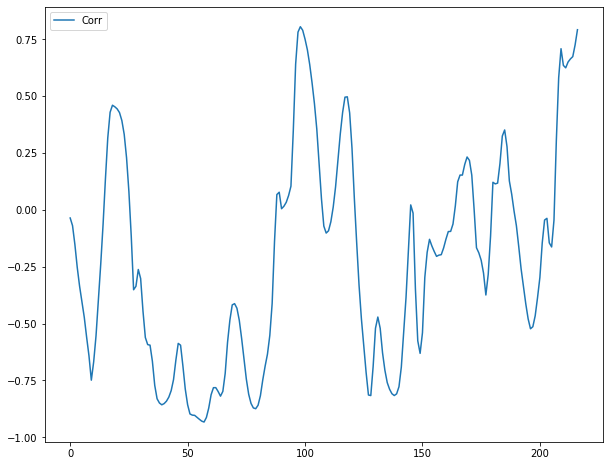

In [0]:
corr=corrfx.roll_corr(x.iloc[:,2].values,x.iloc[:,3].values,20)
plt.figure(figsize=[10,8])
plt.plot(corr,label="Corr")
plt.legend()
plt.show()

In [0]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
arma=sm.tsa.ARIMA(corr,order=(3,0,0))

In [0]:
arma_fit=arma.fit()

<Figure size 576x432 with 0 Axes>

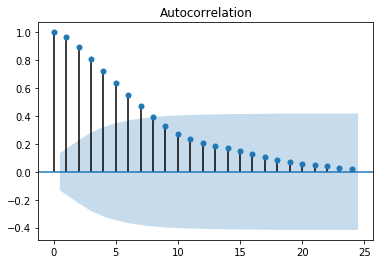

In [0]:
plt.figure(figsize=[8,6])
plot_acf(np.array(corr))
plt.show()

In [0]:
arma_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  217
Model:                     ARMA(3, 0)   Log Likelihood                 305.940
Method:                       css-mle   S.D. of innovations              0.058
Date:                Sun, 16 Feb 2020   AIC                           -601.881
Time:                        00:45:01   BIC                           -584.981
Sample:                             0   HQIC                          -595.054
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1509      0.179     -0.844      0.400      -0.501       0.200
ar.L1.y        2.0805      0.060     34.475      0.000       1.962       2.199
ar.L2.y       -1.5501      0.112    -13.867      0.000      -1.769      -1.331
ar.L3.y        0.4486      0.061      7.379      0.000       0.329       0.568
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0670           -0.0000j            1.0670           -0.0000
AR.2            1.1944           -0.8142j            1.4455           -0.0952
AR.3            1.1944           +0.8142j            1.4455            0.0952
-----------------------------------------------------------------------------
"""